<a href="https://colab.research.google.com/github/leoxiang66/machine-learning/blob/MLO/homework/homework2_P2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import torch
import torch.nn as nn
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal

In [110]:
n = 100

In [111]:
uniform_dist = Uniform(torch.tensor([-1.0]), torch.tensor([1.0]))
X = uniform_dist.sample(torch.Size([n]))

In [112]:
z = Normal(0,1)

In [113]:
X.shape

torch.Size([100, 1])

In [114]:
X[0][0]

tensor(0.1504)

In [115]:
y = torch.Tensor([x[0]+1+ z.sample() for x in X])

In [116]:
y.shape

torch.Size([100])

In [117]:
y[0]

tensor(0.7477)

In [118]:
import torch
import torch.nn as nn


def compute_lse(X,y):
    tmp = torch.matmul(X.T, X)
    tmp = torch.inverse(tmp)
    tmp = torch.matmul(tmp,X.T)
    tmp = torch.matmul(tmp,y)

    return tmp.T

class PolynomialRegression(nn.Module):
    def __init__(self, dim: int, output_dim: int) -> None:
        super().__init__()
        if dim < 0 or output_dim <0:
            raise RuntimeError(f"You entered invalid dimension:{dim}")
        self.dim = dim
        self.linear = nn.Linear(dim+1,output_dim, bias=False)
    @classmethod
    def pd(cls,x,dim):
        '''
        x: scalar
        return: [1, x, x**2, ..., x**dim]
        '''
        result = [1]
        for i in range(dim):
            result.append(torch.pow(x,(i+1)))
        return torch.Tensor(result)
    @classmethod
    def build_X(cls,x,dim:int):
        '''
        return N,dim+1
        '''
        shape = x.shape

        # N
        if len(shape) == 1:
            X = torch.stack([cls.pd(t,dim) for t in x], dim=0)

        # N,1
        elif len(shape) == 2 and shape[1] == 1:
            X = torch.stack([cls.pd(t[0],dim) for t in x], dim=0)
        else:
            raise NotImplementedError('This shape of X is not implemented yet.')

        return X
        

    
    def forward(self,x):
        '''
        x: N or (N,1)
        '''

        # X: N,D+1
        return self.linear(self.build_X(x,self.dim))

    @classmethod
    def least_square_estimate(cls, X, y,dim):
        return compute_lse(cls.build_X(X,dim), y)

    def fit_lse(self,X,y):
        lse = self.least_square_estimate(X,y,self.dim).view((1,-1))
        self.linear.weight = nn.Parameter(lse)




            
        

In [119]:
poly = PolynomialRegression(dim = 2, output_dim=1)

In [120]:
poly.fit_lse(X,y)

In [121]:
y_lse = poly(X).flatten()
y_lse.shape

torch.Size([100])

In [122]:
poly.pd(X[0][0], 5)

tensor([1.0000e+00, 1.5037e-01, 2.2611e-02, 3.4000e-03, 5.1125e-04, 7.6876e-05])

In [123]:
tmp = poly.build_X(X,5)
tmp.shape

torch.Size([100, 6])

# loss function

In [124]:
loss_fn = torch.nn.MSELoss() 

# iterating dimension D

In [125]:
d_max = 10
losses = []
dimensions = [d for d in range(1,d_max)]

In [126]:
print(dimensions)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


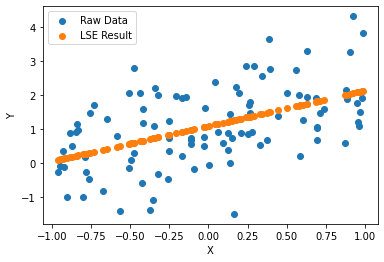

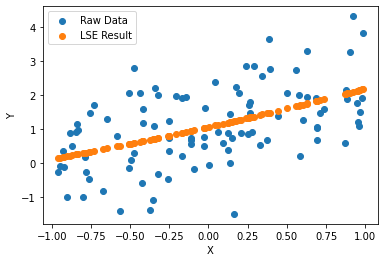

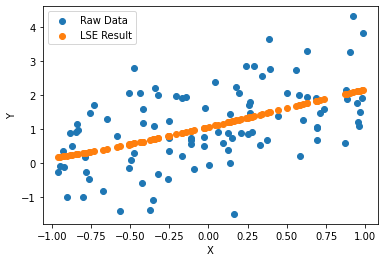

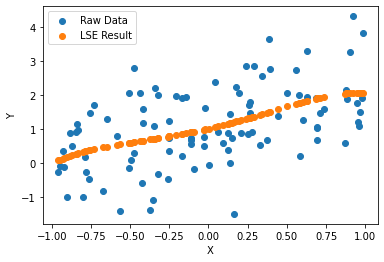

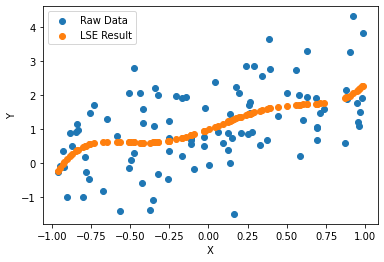

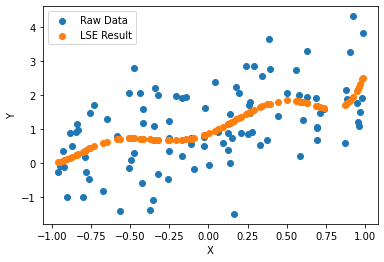

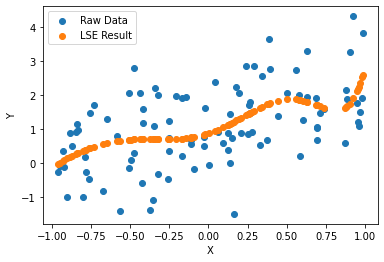

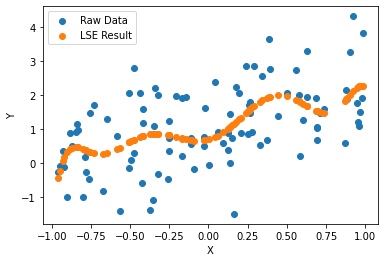

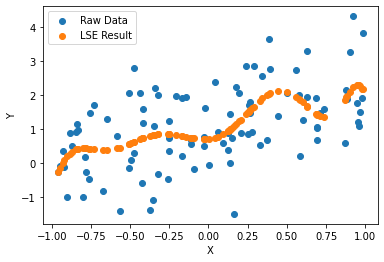

In [127]:
for d in dimensions:
    poly = PolynomialRegression(d,1)
    poly.fit_lse(X,y)
    y_hat = poly(X).flatten()
    loss = loss_fn(y_hat,y).item()
    losses.append(loss)

    plt.scatter(x=X,y=y, label = 'Raw Data')
    plt.scatter(x=X,y=y_hat.detach().numpy(),label = 'LSE Result')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

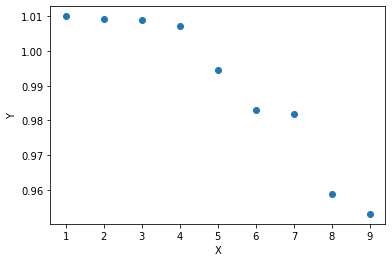

In [128]:
from matplotlib import pyplot as plt
plt.scatter(x=dimensions,y=losses)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# iterating N

In [129]:
dim = 1

In [130]:
ns = list(range(1,10001))

In [131]:
losses = []

In [132]:
for n in ns:
    uniform_dist = Uniform(torch.tensor([-1.0]), torch.tensor([1.0]))
    X = uniform_dist.sample(torch.Size([n]))
    z = Normal(0,1)
    y = torch.Tensor([x[0]+1+ z.sample() for x in X])

    poly = PolynomialRegression(dim,1)
    poly.fit_lse(X,y)
    y_hat = poly(X).flatten()
    loss = loss_fn(y_hat,y).item()
    losses.append(loss)

    # plt.scatter(x=X,y=y, label = 'Raw Data')
    # plt.scatter(x=X,y=y_hat.detach().numpy(),label = 'LSE Result')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.legend()
    # plt.show()



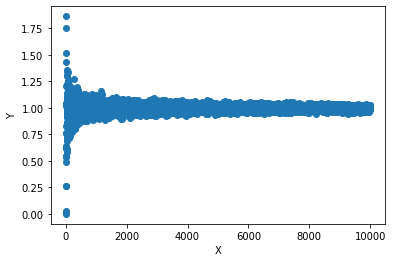

In [133]:
from matplotlib import pyplot as plt
plt.scatter(x=ns,y=losses)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()